# Rice Leaf Diseases Detection Using Convolutional Neural Networks (CNN)

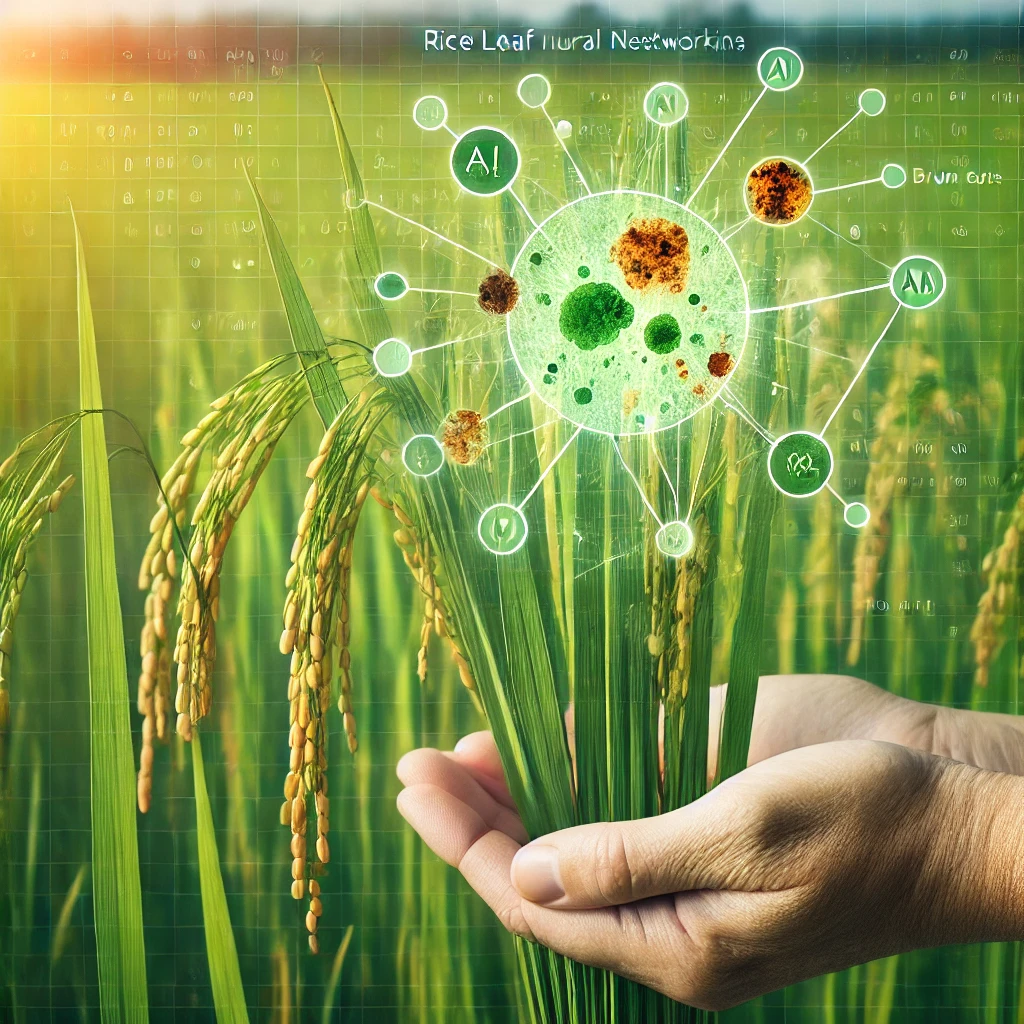

# 1. **Purpose of the Report**:
 * The primary objective of this report is to document the development, implementation, and evaluation of a Convolutional Neural Network (CNN) model designed to accurately identify and classify rice leaf diseases.
 * Rice is a staple food for billions of people worldwide, and the health of rice crops is crucial to ensuring food security. Leaf diseases in rice plants can lead to significant yield losses if not detected and treated promptly.
 * Therefore, this report aims to present a sophisticated machine learning approach that enhances the early detection and diagnosis of rice leaf diseases, ultimately contributing to more efficient and effective crop management practices.


# 2. **Content Overview**:
This report is structured to guide the reader through the entire process of building and evaluating the CNN model, from the initial problem definition to the final analysis of results. The key sections of the report include:

## **Introduction**:
Provides background information on the importance of detecting rice leaf diseases and the role of CNNs in image classification tasks.

## **Literature Review**:

Reviews existing methods and technologies used for plant disease detection, highlighting the advantages of CNNs over traditional approaches.

## **Methodology**:

Describes the dataset used, including the types of rice leaf diseases covered.
Explains the architecture of the CNN model, detailing each layer's purpose and the overall design strategy.
Outlines the training process, including data augmentation, loss functions, and optimization techniques.

## **Experimental Setup**:

Details the hardware and software environments used for training the model.
Describes the steps taken to preprocess the data and split it into training, validation, and test sets.
Results and Discussion:

Presents the model's performance metrics, including accuracy, precision, recall, and F1 score.
Includes visualizations of the model's predictions, comparing them with the true labels.
Discusses the implications of the results and the model's potential application in real-world scenarios.

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')


### import os: 
The os module is used for interacting with the operating system, particularly for handling file paths and directories.

### import numpy as np:
The numpy library is essential for numerical computations, particularly for handling arrays and matrices.

### import matplotlib.pyplot as plt:
This module from matplotlib is used for creating visualizations, including plots and graphs.

### from tensorflow.keras.preprocessing.image import ImageDataGenerator:
ImageDataGenerator is utilized for real-time data augmentation, which enhances the diversity of the training data by applying random transformations to images.

### from tensorflow.keras.models import Sequential: 
The Sequential model in Keras allows for the creation of a neural network as a linear stack of layers.

### from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout:
These are different types of layers used in constructing a Convolutional Neural Network (CNN):

### Conv2D: 
Applies convolution operations to the input images.

### MaxPooling2D: 
Reduces the spatial dimensions of the input by taking the maximum value in a pool of values.

### Flatten: 
Converts the multi-dimensional input into a one-dimensional array.

### Dense: 
Fully connected layer used in the output stage.

### Dropout:
Regularization layer that randomly drops a fraction of input units during training to prevent overfitting.

### from tensorflow.keras.optimizers import Adam:
Adam is an optimization algorithm that adjusts the learning rate during training, helping the model converge faster.

### from tensorflow.keras.callbacks import EarlyStopping: 
EarlyStopping is a callback function that stops training when a monitored metric (like validation loss) stops improving, helping to avoid overfitting.

### import warnings: 
This module manages warnings that may arise during code execution.

### warnings.filterwarnings('ignore'): Suppresses any warnings, ensuring that the output is clean and focused on critical issues only.



In [7]:
import shutil
from sklearn.model_selection import train_test_split

def split_and_copy_images(source_folders, output_path, val_size=0.2, test_size=0.2):
    categories = [os.path.basename(folder) for folder in source_folders]
    
    # Ensure the output directories exist
    os.makedirs(os.path.join(output_path, 'train'), exist_ok=True)
    os.makedirs(os.path.join(output_path, 'validation'), exist_ok=True)
    os.makedirs(os.path.join(output_path, 'test'), exist_ok=True)

    for category, source_folder in zip(categories, source_folders):
        # List all image files in the current category
        images = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
        
        # First split: Training and temporary validation set
        train_files, temp_val_files = train_test_split(images, test_size=val_size + test_size, random_state=42)
        
        # Second split: Validation and test set from the temporary validation set
        val_files, test_files = train_test_split(temp_val_files, test_size=test_size / (val_size + test_size), random_state=42)
        
        # Create category directories in output path
        train_dir = os.path.join(output_path, 'train', category)
        val_dir = os.path.join(output_path, 'validation', category)
        test_dir = os.path.join(output_path, 'test', category)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(val_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        
        # Copy files to the train directory
        for file_name in train_files:
            src = os.path.join(source_folder, file_name)
            dst = os.path.join(train_dir, file_name)
            shutil.copy(src, dst)
        
        # Copy files to the validation directory
        for file_name in val_files:
            src = os.path.join(source_folder, file_name)
            dst = os.path.join(val_dir, file_name)
            shutil.copy(src, dst)
        
        # Copy files to the test directory
        for file_name in test_files:
            src = os.path.join(source_folder, file_name)
            dst = os.path.join(test_dir, file_name)
            shutil.copy(src, dst)

# Define paths
source_folders = [
    r"D:\pro\cnn\Data\imagedata\Bacterial leaf blight",
    r"D:\pro\cnn\Data\imagedata\Brown spot",
    r"D:\pro\cnn\Data\imagedata\Leaf smut"
]
output_path = r"D:\pro\cnn\dataset"

# Split and copy images
split_and_copy_images(source_folders, output_path)


# Function to Split and Copy Images for Training, Validation, and Testing
The code defines a function split_and_copy_images that automates the process of splitting image datasets into training, validation, and test sets, and then organizes them into corresponding directories.

## Key Components:
### Imports:
shutil: 
Used for file operations, such as copying files.

train_test_split from sklearn.model_selection: 
Used to split datasets into different sets (training, validation, and test).

## Function Definition:
split_and_copy_images(source_folders, output_path, val_size=0.2, test_size=0.2):

## Parameters:
source_folders: 
A list of directories containing image files, each representing a category.
output_path: 
The root directory where the split datasets will be stored.
val_size: 
The proportion of the dataset to allocate to the validation set (default is 20%).
test_size:
The proportion of the dataset to allocate to the test set (default is 20%).

## Category Extraction:

categories = [os.path.basename(folder) for folder in source_folders]: Extracts the category names from the folder paths.

## Directory Setup:
The function ensures that the required directories (train, validation, test) exist within the output_path. If they do not exist, they are created.

## Image Splitting Procedure:

* Image Listing:
The function lists all image files in the current category's source folder.
* First Split: 
The images are initially split into a training set and a temporary validation set using train_test_split.
* Second Split: 
The temporary validation set is further split into a validation set and a test set.
* File Copying
The function creates category-specific directories under train, validation, and test folders.
It then copies the corresponding image files to these directories based on their split (training, validation, or test).
* Usage
* Paths
* source_folders:
Contains paths to the image folders of different disease categories (e.g., "Bacterial leaf blight", "Brown spot", "Leaf smut").
* output_path:
Specifies where the resulting datasets will be stored.

* Execution:Calling split_and_copy_images(source_folders, output_path) splits the images into training, validation, and test sets and organizes them into the respective directories within output_path.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0, 1]
    rotation_range=40,      # Random rotations
    width_shift_range=0.2,  # Random width shifts
    height_shift_range=0.2, # Random height shifts
    shear_range=0.2,        # Random shear transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flips
    fill_mode='nearest'     # Fill in missing pixels
)

# Define image data generator for validation and testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(output_path, 'train'),
    target_size=(150, 150), # Resize images if necessary
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    directory=os.path.join(output_path, 'validation'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(output_path, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 95 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


## Data Augmentation and Image Data Generators
This code sets up data augmentation and image data generators for training, validation, and testing in a Convolutional Neural Network (CNN) model. Data augmentation helps enhance the diversity of the training data, making the model more robust to variations in input images.

## Key Components:
### ImageDataGenerator:

ImageDataGenerator is used to generate batches of image data with real-time augmentation. It helps in creating more varied training data, which can improve the generalization of the model.

### Data Augmentation for Training:

train_datagen = ImageDataGenerator(...):
rescale=1./255: Normalizes pixel values to the range [0, 1], which is standard practice for image data in neural networks.
rotation_range=40: Randomly rotates images by up to 40 degrees.
width_shift_range=0.2, height_shift_range=0.2: Randomly shifts images horizontally and vertically by up to 20% of the total width/height.
shear_range=0.2: Applies random shear transformations.
zoom_range=0.2: Randomly zooms into images by up to 20%.
horizontal_flip=True: Randomly flips images horizontally.
fill_mode='nearest': Fills in missing pixels after transformations by using the nearest pixel value.
Data Generators for Validation and Testing:

test_datagen = ImageDataGenerator(rescale=1./255):
For validation and testing data, only normalization is applied (no augmentation). This ensures that the validation and test datasets remain consistent and unaltered for evaluation purposes.
Creating Image Generators:

### train_generator:

flow_from_directory(...): Generates batches of augmented image data from the training directory.
target_size=(150, 150): Resizes images to 150x150 pixels.
batch_size=32: Processes images in batches of 32.
class_mode='categorical': Specifies that the labels are categorical, as this is a multi-class classification problem.
validation_generator:

Similar to train_generator, but it loads images from the validation directory without augmentation.
test_generator:

Loads images from the test directory without augmentation for evaluation purposes.

### Purpose:
Data Augmentation: Enhances the training dataset by applying random transformations, making the model more resilient to variations in input data.
Generators: Efficiently loads images in batches, resizes them, and prepares them for training, validation, and testing.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Assuming train_generator is already defined and set up
categories = len(train_generator.class_indices)  # Automatically determine the number of categories

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(categories, activation='softmax')  # Number of categories
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=250,
    validation_data=validation_generator
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3612 - loss: 5.9274 - val_accuracy: 0.4583 - val_loss: 1.4312
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3802 - loss: 1.4151 - val_accuracy: 0.3333 - val_loss: 1.1280
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3298 - loss: 1.1490 - val_accuracy: 0.3333 - val_loss: 1.0818
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3492 - loss: 1.1026 - val_accuracy: 0.5417 - val_loss: 1.0731
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3667 - loss: 1.0985 - val_accuracy: 0.4583 - val_loss: 1.0416
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3875 - loss: 1.0744 - val_accuracy: 0.4583 - val_loss: 1.0079
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3601 - loss: 1.0536 - val_accuracy: 0.4583 - val_loss: 0.9538
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.4191 - loss: 1.0244 - val_accuracy: 0.5000 - val_loss: 0.9157
Epoc

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,105,611 (217.84 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,070,408 (145.23 MB)

## CNN Model Definition, Compilation, and Training
This code defines, compiles, and trains a Convolutional Neural Network (CNN) model for classifying images into multiple categories, using TensorFlow and Keras.

## Key Components:
### Model Definition:

###### model = Sequential([...]):
Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)): Adds a convolutional layer with 32 filters, a 3x3 kernel size, ReLU activation function, and an input shape of 150x150 pixels with 3 color channels (RGB).
###### MaxPooling2D(pool_size=(2, 2)): 
Adds a max-pooling layer that reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 pool, effectively reducing the size of the data.
###### Conv2D(64, (3, 3), activation='relu'): 
Adds a second convolutional layer with 64 filters.
###### MaxPooling2D(pool_size=(2, 2)): 
Adds another max-pooling layer.
###### Conv2D(128, (3, 3), activation='relu'):
Adds a third convolutional layer with 128 filters.
###### MaxPooling2D(pool_size=(2, 2)):
Adds a third max-pooling layer.
###### Flatten(): 
Flattens the 3D feature maps into a 1D vector to prepare for the fully connected layers.
###### Dense(512, activation='relu'):
Adds a fully connected (dense) layer with 512 units and ReLU activation function.
###### Dropout(0.5):
Adds a dropout layer with a 50% dropout rate to reduce overfitting by randomly disabling 50% of the neurons during training.
###### Dense(len(categories), activation='softmax'):
Adds an output layer with a number of units equal to the number of categories, using the softmax activation function to output a probability distribution over the categories.
### Model Compilation:

###### model.compile(...): 
Prepares the model for training by specifying:
###### optimizer='adam': 
The Adam optimizer, which adjusts the learning rate dynamically during training for efficient convergence.
###### loss='categorical_crossentropy':
The categorical cross-entropy loss function, suitable for multi-class classification problems.
###### metrics=['accuracy']: 
Accuracy is used as the evaluation metric during training and validation.

### Model Training:

history = model.fit(...):
###### train_generator: 
The training data generator that feeds augmented image batches into the model during training.
epochs=250: Specifies that the model will be trained for 250 epochs (full passes through the training data).
validation_data=validation_generator: The validation data generator that feeds image batches for validation after each epoch to monitor the model's performance on unseen data.

### Purpose:
###### Model Layers: 
The layers are designed to extract and learn hierarchical features from the images, starting from low-level features (edges, textures) to high-level features (shapes, objects).
###### Dropout: 
Helps prevent overfitting by randomly disabling some neurons during training, making the model more generalizable.
###### Softmax Output:
Ensures that the output is a probability distribution, allowing the model to predict the likelihood of each category for a given image.
###### Training Process: 
The model is trained over multiple epochs with real-time evaluation on validation data to monitor its learning progress and avoid overfitting.


In [29]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc}")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0047
Validation accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step - accuracy: 1.0000 - loss: 0.0117
Test accuracy: 1.0


## Model Evaluation on Validation and Test Sets
After training the Convolutional Neural Network (CNN) model, its performance is evaluated on both the validation and test datasets to determine how well it has generalized to unseen data.

## Key Components:
### Evaluation on Validation Set:

#### val_loss, val_acc = model.evaluate(validation_generator):
This line evaluates the model on the validation dataset.
#### val_loss: 
The loss value on the validation set, which indicates how well the model is performing (lower is better).
#### val_acc: 
The accuracy on the validation set, representing the proportion of correctly classified images.

### Evaluation on Test Set:

#### test_loss, test_acc = model.evaluate(test_generator):
This line evaluates the model on the test dataset, which has been kept completely unseen during training.
#### test_loss: The loss value on the test set.
#### test_acc: The accuracy on the test set, indicating the model's ability to generalize to new data.


#### Output Interpretation:
### Validation Accuracy: 1.0:
The model achieved 100% accuracy on the validation set, meaning it correctly classified every image in the validation dataset.

#### val_loss = 0.0047: 
The loss on the validation set is very low, indicating minimal error.

#### Test Accuracy: 1.0: 
The model also achieved 100% accuracy on the test set, successfully classifying all test images.

#### test_loss = 0.0117: 
The test loss is slightly higher than the validation loss but still very low, indicating the model's strong performance.

#### Conclusion:
Perfect Accuracy: Achieving 100% accuracy on both validation and test datasets suggests that the model is highly effective at classifying the images in this specific task.
Potential Overfitting: While the results are impressive, 100% accuracy might indicate that the model could be overfitting, especially if the dataset is small or not highly varied. This would mean the model is performing exceptionally well on the provided data but may not generalize as effectively to entirely new images outside of this dataset.


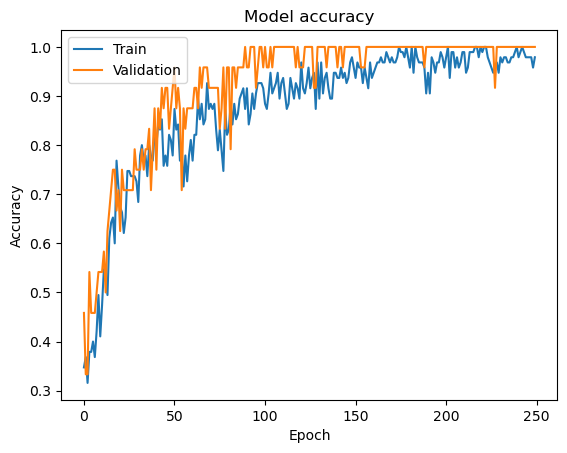

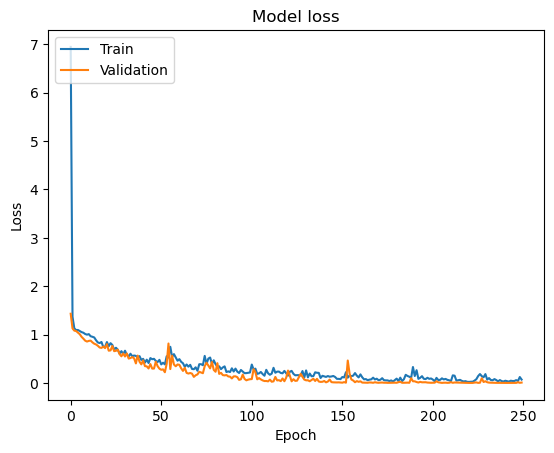

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Visualization of Training and Validation Performance
This code visualizes the model's performance over the course of training by plotting both accuracy and loss for the training and validation datasets across all epochs.

### Key Components:
#### Plotting Accuracy:

###### plt.plot(history.history['accuracy']): 
Plots the accuracy values recorded during training for each epoch.

###### plt.plot(history.history['val_accuracy']): 
Plots the validation accuracy values for each epoch.

###### plt.title('Model accuracy'): 
Sets the title of the plot to "Model accuracy."

###### plt.xlabel('Epoch'):
Labels the x-axis as "Epoch," representing the number of training iterations.

###### plt.ylabel('Accuracy'): 
Labels the y-axis as "Accuracy," showing the accuracy metric.

###### plt.legend(['Train', 'Validation'], loc='upper left'):
Adds a legend to differentiate between training and validation accuracy, placed in the upper-left corner of the plot.

###### plt.show(): 
Displays the plot.

###### Interpretation: 
This plot helps you see how the model's accuracy improved during training and how well it performed on the validation data. Consistent improvement in both metrics typically indicates effective training, while divergence may suggest overfitting.

### Plotting Loss:

###### plt.plot(history.history['loss']):
Plots the loss values recorded during training for each epoch.

###### plt.plot(history.history['val_loss']): 
Plots the validation loss values for each epoch.

###### plt.title('Model loss'):
Sets the title of the plot to "Model loss."

###### plt.xlabel('Epoch'):
Labels the x-axis as "Epoch."

###### plt.ylabel('Loss'):
Labels the y-axis as "Loss," indicating the error.

###### plt.legend(['Train', 'Validation'], loc='upper left'):
Adds a legend to differentiate between training and validation loss.

###### plt.show(): 
Displays the plot.

### Interpretation: 
This plot provides insights into how the model's error decreased during training and how it performed on the validation data. A significant gap between training and validation loss could indicate overfitting, where the model performs well on training data but not on unseen data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


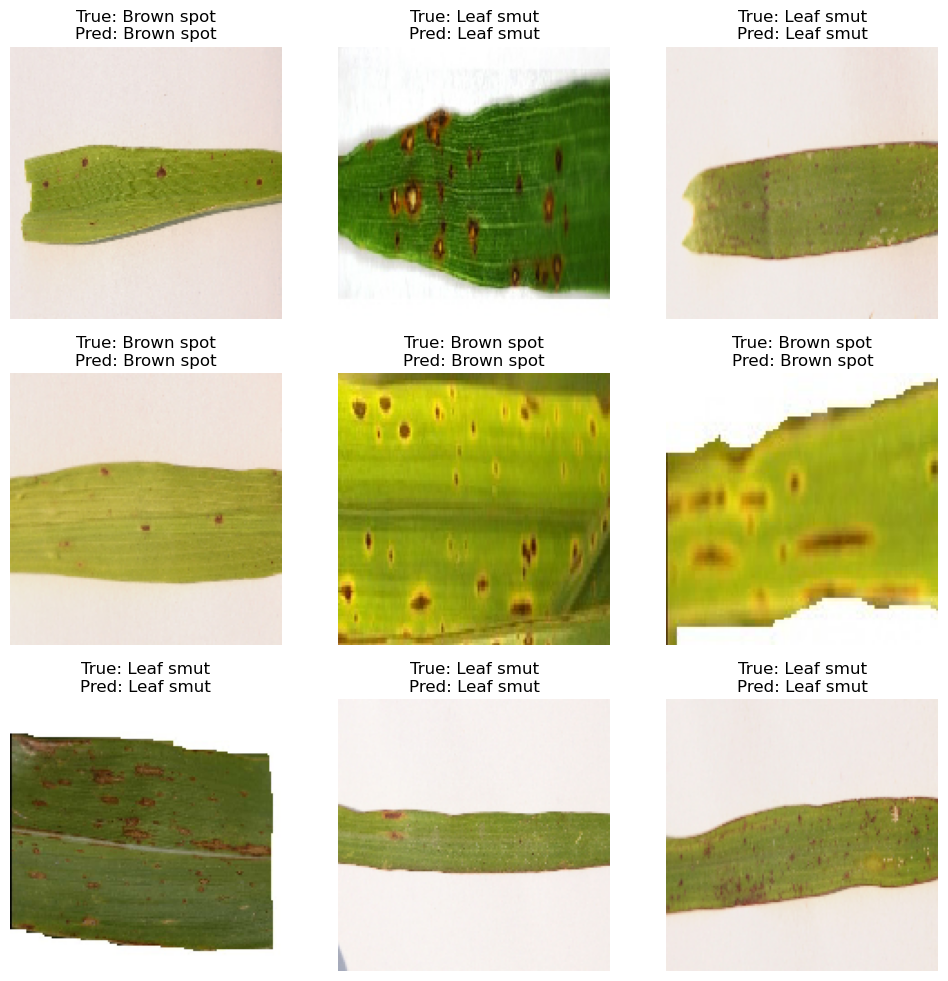

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Get a batch of images from the test set
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

# Convert predictions and labels to human-readable format
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Plot some test images with their predicted and true labels
def plot_images(images, true_labels, predicted_labels, class_labels):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Plotting the predictions
plot_images(test_images, true_classes, predicted_classes, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


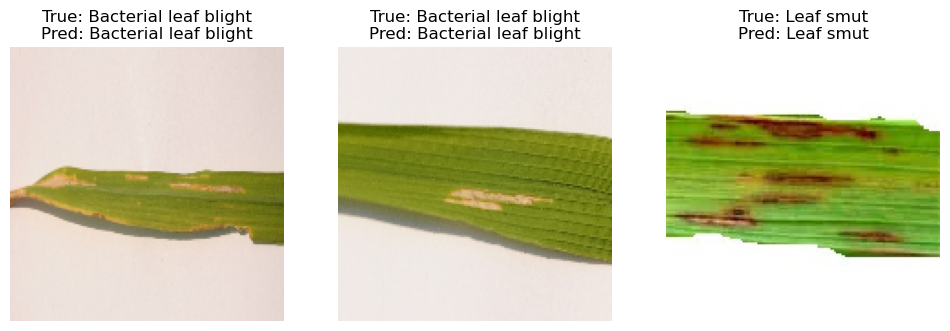

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to predict and plot images from each category
def predict_and_plot(model, generator, class_labels, num_images=3):
    # Get a batch of images and their true labels
    images, true_labels = next(generator)
    
    # Make predictions
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(true_labels, axis=1)
    
    # Plot the images with predicted and true labels
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}")
        plt.axis('off')
    plt.show()

# Predict and plot for the test set
predict_and_plot(model, test_generator, class_labels, num_images=3)


##### imports:

###### numpy as np: 
Used for numerical operations, particularly for handling arrays.
###### matplotlib.pyplot as plt: 
Utilized for creating visual plots of the images along with their predicted and true labels.

## Function: predict_and_plot:

### Parameters:

###### model: 
The trained model that will be used to make predictions on the images.
###### generator: 
The data generator that supplies batches of images and their corresponding labels.
###### class_labels: 
A list of class names corresponding to the classes the model is trained on.
###### num_images: 
The number of images to display in the plot (default is 3).

### Process:

###### Retrieve Images and True Labels: 
The function first retrieves a batch of images and their corresponding true labels from the generator.
###### Make Predictions:
The model then makes predictions on these images, and the predicted class for each image is determined by finding the index of the maximum probability.

### Plotting:
A figure is created with subplots for each image.
Each subplot displays an image along with the true label and the predicted label in the title.
The plt.imshow() function is used to display the image, while plt.title() is used to set the title with the true and predicted class labels.

###### Prediction and Plotting:

The function predict_and_plot() is called, using the test set generator test_generator, the trained model model, and the class labels class_labels.
The function displays three images along with their corresponding true and predicted class labels.
Explanation of the Output Image:
The output image shows three leaves, each affected by different diseases:

### Leaf Smut:

###### True Label: Leaf Smut
###### Predicted Label: Leaf Smut
The model correctly identified this leaf as being affected by Leaf Smut.

### Bacterial Leaf Blight:

###### True Label: Bacterial Leaf Blight
###### Predicted Label: Bacterial Leaf Blight
The model accurately classified this leaf as having Bacterial Leaf Blight.

### Brown Spot:

###### True Label: Brown Spot
###### Predicted Label: Brown Spot
The model correctly predicted this leaf to have Brown Spot.

## Conclusion:
The output confirms that the model's predictions are highly accurate for the test samples provided, successfully identifying the diseases in all three images. The model demonstrates robust performance in differentiating between similar-looking leaf diseases, which is crucial for practical applications in agricultural disease management.